In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# About the Dataset
Student Sleep Patterns Dataset
This dataset explores the sleep patterns of university students, aiming to identify correlations between sleep duration, sleep quality, and various lifestyle factors. The data is synthetic, meaning it was artificially generated and does not represent real individuals. However, it follows realistic distributions and relationships to provide a useful basis for analysis and modeling.
More documentation can be found is a word document attached to this codefile

Data Source: https://www.kaggle.com/datasets/arsalanjamal002/student-sleep-patterns

In [6]:
df = pd.read_csv(r"C:\Users\JABARi\Documents\GitHub\ML-classification-project\student_sleep_patterns.csv")
df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


In [7]:
# Convert Sleep_Quality to binary classification
df['Sleep_Quality'] = df['Sleep_Quality'].apply(lambda x: 0 if x <= 5 else 1)
df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,1,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,0,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,0,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,1,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,0,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,0,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,0,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,1,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,0,19.10,15.49,8.35,7.20


# Exploratory Data Analysis

In [8]:
#Chceking the shape of the dataset
df.shape

(500, 14)

In [9]:
#Checking the datatypes
df.dtypes

Student_ID               int64
Age                      int64
Gender                  object
University_Year         object
Sleep_Duration         float64
Study_Hours            float64
Screen_Time            float64
Caffeine_Intake          int64
Physical_Activity        int64
Sleep_Quality            int64
Weekday_Sleep_Start    float64
Weekend_Sleep_Start    float64
Weekday_Sleep_End      float64
Weekend_Sleep_End      float64
dtype: object

In [10]:
#Checking missing values
df.isnull().sum()

Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

In [11]:
#Checking statistics of dataset
df.describe()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,0.494000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,0.500465,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,0.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,0.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,0.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,1.000000,16.152500,17.327500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,1.000000,21.930000,22.000000,8.980000,10.990000


In [12]:
#Examining the columns
df.columns

Index(['Student_ID', 'Age', 'Gender', 'University_Year', 'Sleep_Duration',
       'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity',
       'Sleep_Quality', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start',
       'Weekday_Sleep_End', 'Weekend_Sleep_End'],
      dtype='object')

In [13]:
# Define the target variable (y) and features (X)
y = df['Sleep_Quality']
X = df[['Student_ID', 'Age', 'Gender', 'University_Year', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End']]

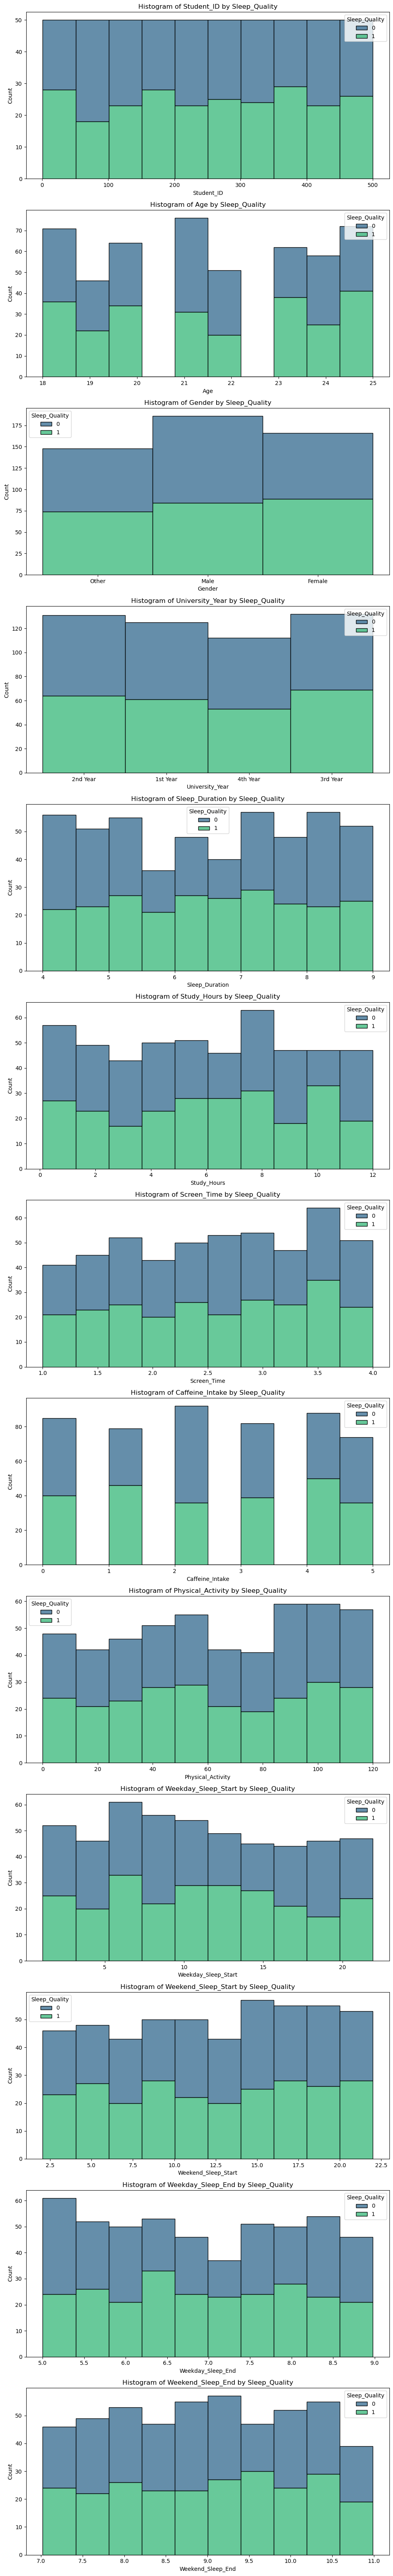

In [14]:
# Set up the figure for subplots
fig, axes = plt.subplots(len(X.columns), 1, figsize=(10, 5 * len(X.columns)))

# Iterate over numerical columns and plot histograms
for i, column in enumerate(X.columns):
    sns.histplot(data=df, x=column, hue=y, multiple="stack", palette="viridis", ax=axes[i])
    axes[i].set_title(f"Histogram of {column} by Sleep_Quality")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()
